In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
import dtreeviz

In [63]:
auto = pd.read_csv("adverts.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [64]:
auto.loc[auto["price"]==9999999]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


In [65]:
auto["price"] = auto["price"].replace(9999999, auto["price"].mean())

In [66]:
auto.loc[auto["price"]>1e6]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
21997,201911084154244,2180.0,10,Blue,Bugatti,Veyron,USED,2010.0,1590000.0,Convertible,False,Petrol
51741,202002257718775,4400.0,14,Black,Bugatti,Veyron,USED,2014.0,2850000.0,Coupe,False,Petrol
62571,202010215263340,2200.0,NaN,Black,Porsche,918,USED,2016.0,1099950.0,Convertible,False,Petrol Hybrid
64910,202006039766650,189.0,NaN,Black,McLaren,P1,USED,NaN,2695000.0,Coupe,False,Petrol Plug-in Hybrid
72681,202007010711087,475.0,15,Yellow,Ferrari,LaFerrari,USED,2015.0,2299950.0,Coupe,False,Petrol
94033,202007020778467,1900.0,18,White,Pagani,Huayra,USED,NaN,2400000.0,Convertible,False,Petrol
103974,202010074708314,10895.0,16,Blue,Bugatti,Veyron,USED,2016.0,1699995.0,Coupe,False,NaN
145819,202007070959470,6170.0,63,Red,Ferrari,LaFerrari,USED,2013.0,2150000.0,Coupe,False,Petrol Plug-in Hybrid
175995,202009254208162,3660.0,63,Yellow,McLaren,P1,USED,2013.0,1200000.0,Coupe,False,Petrol Plug-in Hybrid
177165,202007271729483,45.0,L,Silver,Porsche,911,USED,1993.0,1395000.0,Coupe,False,Petrol


In [67]:
auto.iloc[141833]

public_reference         202007050883898
mileage                          87450.0
reg_code                             NaN
standard_colour                      Red
standard_make                    Ferrari
standard_model                       250
vehicle_condition                   USED
year_of_registration                 NaN
price                       17341.965799
body_type                          Coupe
crossover_car_and_van              False
fuel_type                         Petrol
Name: 141833, dtype: object

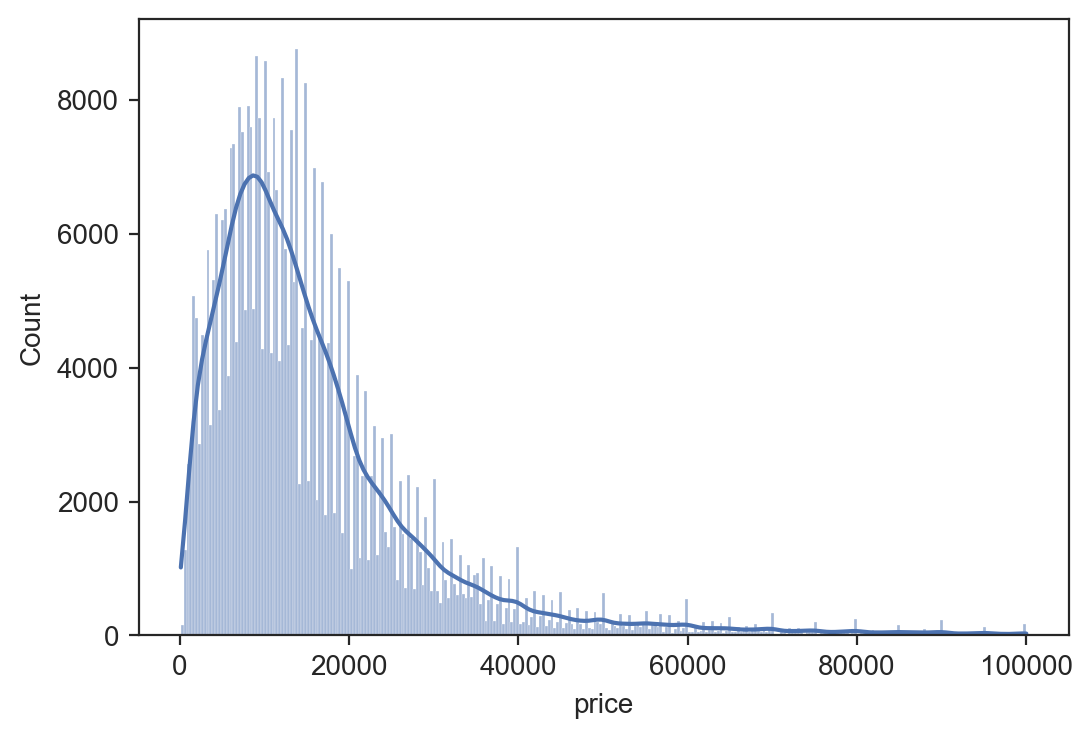

In [68]:
sns.histplot(data=auto.loc[auto["price"]<1e5], kde=True, x="price");

In [69]:
make, ordered_model = zip(*sorted(zip(auto["standard_make"], auto["standard_model"])))
for i in range(1, 400000, 20000):
    print("Make:", make[i], ":", ordered_model[i])

Make: AC : Cobra
Make: Audi : A5
Make: BMW : 1 Series
Make: BMW : 4 Series
Make: Citroen : C1
Make: Fiat : 500
Make: Hyundai : i10
Make: Kia : Rio
Make: Land Rover : Range Rover Sport
Make: Mazda : CX-5
Make: Mercedes-Benz : C Class
Make: Mitsubishi : Outlander
Make: Nissan : X-Trail
Make: Porsche : Macan
Make: SEAT : Leon
Make: Suzuki : Celerio
Make: Toyota : Yaris
Make: Vauxhall : Corsa
Make: Volkswagen : Golf
Make: Volkswagen : Polo


In [70]:
print(auto.columns)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')


In [71]:
for column in ["crossover_car_and_van", "fuel_type", "vehicle_condition"]:
    print(column, auto[column].unique())

crossover_car_and_van [False  True]
fuel_type ['Petrol Plug-in Hybrid' 'Diesel' 'Petrol' 'Diesel Hybrid' 'Petrol Hybrid'
 'Electric' 'Diesel Plug-in Hybrid' nan 'Bi Fuel' 'Natural Gas']
vehicle_condition ['NEW' 'USED']


In [72]:
print("standard_model", auto["standard_model"].unique()[:5], len(auto["standard_model"].unique()))

standard_model ['XC90' 'XF' 'Yeti' 'Mokka' 'Range Rover Sport'] 1168


In [73]:
def map_to_int(str_list):
    try:str_list.sort()
    except: pass
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

In [74]:
for column in auto.columns:
    print(column, auto[column].unique()[:5], len(auto[column].unique()))
    types = set()
    for entry in auto[column].unique():
        types.add(type(entry))
    print(types)

public_reference [202006039777689 202007020778260 202007020778474 202007080986776
 202007161321269] 402005
{<class 'numpy.int64'>}
mileage [     0. 108230.   7800.  45000.  64000.] 80635
{<class 'numpy.float64'>}
reg_code [nan '61' '17' '16' '64'] 73
{<class 'float'>, <class 'str'>}
standard_colour ['Grey' 'Blue' 'Brown' 'Red' 'Bronze'] 23
{<class 'float'>, <class 'str'>}
standard_make ['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover'] 110
{<class 'str'>}
standard_model ['XC90' 'XF' 'Yeti' 'Mokka' 'Range Rover Sport'] 1168
{<class 'str'>}
vehicle_condition ['NEW' 'USED'] 2
{<class 'str'>}
year_of_registration [  nan 2011. 2017. 2016. 2015.] 85
{<class 'numpy.float64'>}
price [73970.  7000. 14000.  7995. 26995.] 30578
{<class 'numpy.float64'>}
body_type ['SUV' 'Saloon' 'Hatchback' 'Convertible' 'Limousine'] 17
{<class 'float'>, <class 'str'>}
crossover_car_and_van [False  True] 2
{<class 'numpy.bool_'>}
fuel_type ['Petrol Plug-in Hybrid' 'Diesel' 'Petrol' 'Diesel Hybrid' 'Petrol Hybrid'

In [75]:
# column = "standard_model"
# make, ordered_model = zip(*sorted(zip(auto["standard_make"], auto["standard_model"])))
# for i in range(1, 400000, 20000):
#     print("Make:", make[i], ":", ordered_model[i])
# mapping_dict = map_to_int(auto[column].unique())           
# auto[column] = auto[column].replace(to_replace=mapping_dict)
# print(auto[column].sample(10))

In [76]:
# Map str values to integers
for column in ["standard_model", "standard_colour", "reg_code", "standard_make", "body_type", "fuel_type", "crossover_car_and_van", "fuel_type", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())
    if len(auto[column].unique()) < 30:
        print(column, mapping_dict)                              
    auto[column] = auto[column].replace(to_replace=mapping_dict)

standard_colour {'Grey': 0, 'Blue': 1, 'Brown': 2, 'Burgundy': 3, 'Bronze': 4, 'Black': 5, 'Beige': 6, 'Gold': 7, 'Turquoise': 8, 'Yellow': 9, 'Navy': 10, 'Indigo': 11, 'Purple': 12, nan: 13, 'Silver': 14, 'Multicolour': 15, 'White': 16, 'Red': 17, 'Pink': 18, 'Maroon': 19, 'Magenta': 20, 'Green': 21, 'Orange': 22}
body_type {'SUV': 0, 'Camper': 1, 'Window Van': 2, 'Minibus': 3, 'Panel Van': 4, 'Combi Van': 5, 'Pickup': 6, 'Car Derived Van': 7, nan: 8, 'MPV': 9, 'Estate': 10, 'Limousine': 11, 'Convertible': 12, 'Hatchback': 13, 'Saloon': 14, 'Coupe': 15, 'Chassis Cab': 16}
fuel_type {'Diesel': 0, 'Diesel Hybrid': 1, 'Diesel Plug-in Hybrid': 2, 'Electric': 3, 'Petrol': 4, 'Petrol Hybrid': 5, 'Petrol Plug-in Hybrid': 6, nan: 7, 'Bi Fuel': 8, 'Natural Gas': 9}
crossover_car_and_van {False: 0, True: 1}
fuel_type {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
vehicle_condition {'NEW': 0, 'USED': 1}


In [77]:
for column in auto.columns:   
    auto[column] = auto[column].fillna(auto[column].mean())

In [78]:
auto.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
314463,202009294345256,6358.0,43,14,61,376,1,2019.0,28429.0,0,0,4
56566,202010104830028,15251.0,50,4,11,1091,1,2017.0,17700.0,0,0,0
230986,202006190301797,64792.0,70,0,104,582,1,2017.0,9725.0,13,0,0
21246,202010124889736,100.0,64,16,105,925,1,2020.0,29995.0,9,0,0
154009,202010205230685,85000.0,54,1,64,681,1,2014.0,4599.0,13,0,4
121303,202010255404591,78000.0,49,5,8,178,1,2016.0,9000.0,13,0,0
16336,202010205212595,8000.0,65,1,54,428,1,2020.0,42495.0,0,0,0
145589,202009163801485,23072.0,39,5,61,560,1,2015.0,17279.0,13,0,4
182524,202008252907248,21706.0,67,5,66,855,1,2019.0,40980.0,14,0,0
48505,202010014468198,21000.0,70,7,104,193,1,2018.0,7695.0,13,0,4


In [79]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
knnr = KNeighborsRegressor(n_neighbors=45)

knnr.fit(X_train, y_train)
knnr.score(X_train, y_train), knnr.score(X_test, y_test)

(0.14776500030761197, 0.12035919796340111)

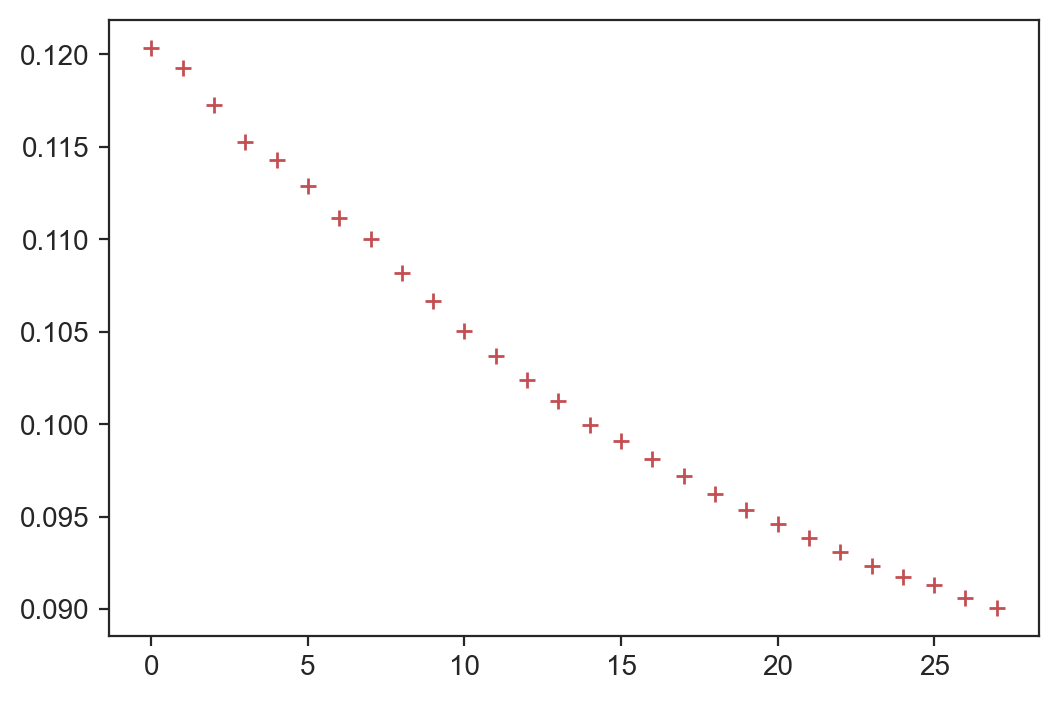

In [ ]:
# plt.plot(scores, "r+")